In [18]:
%load_ext autoreload
%autoreload 2

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(columns=["frame"])
X = df.drop('class', axis=1) 
y = df['class']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=12345)

In [4]:
y_test

428            coronavirus
310    dificultad_respirar
99                hospital
119               hospital
298    dificultad_respirar
              ...         
190         dolor_garganta
772                 medico
139     ponerse_mascarilla
134     ponerse_mascarilla
213         dolor_garganta
Name: class, Length: 242, dtype: object

In [5]:
pipelines = {
    'lr':make_pipeline(MinMaxScaler(), LogisticRegression()),
    'rc':make_pipeline(MinMaxScaler(), RidgeClassifier()),
    'rf':make_pipeline(MinMaxScaler(), RandomForestClassifier()),
    'sv':make_pipeline(MinMaxScaler(), SVC(probability=True))
}

In [6]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

/home/victor/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
fit_models

{'lr': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'sv': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('svc', SVC(probability=True))])}

In [8]:
fit_models['sv'].predict(X_test)

array(['dificultad_respirar', 'dificultad_respirar', 'hospital',
       'hospital', 'dificultad_respirar', 'coronavirus', 'hospital',
       'fiebre', 'dolor_garganta', 'dificultad_respirar',
       'dolor_garganta', 'dolor_cabeza', 'fiebre', 'dificultad_respirar',
       'dificultad_respirar', 'coronavirus', 'quedan_en_casa',
       'coronavirus', 'dificultad_respirar', 'medico',
       'dificultad_respirar', 'coronavirus', 'dificultad_respirar',
       'ponerse_mascarilla', 'dolor_garganta', 'dificultad_respirar',
       'hospital', 'coronavirus', 'dificultad_respirar', 'coronavirus',
       'dificultad_respirar', 'dificultad_respirar', 'quedan_en_casa',
       'fiebre', 'coronavirus', 'dificultad_respirar', 'dolor_garganta',
       'quedan_en_casa', 'fiebre', 'evitar_contacto', 'dolor_garganta',
       'coronavirus', 'evitar_contacto', 'evitar_contacto',
       'dolor_garganta', 'ponerse_mascarilla', 'hospital', 'coronavirus',
       'dificultad_respirar', 'evitar_contacto', 'fiebre

In [9]:
names=['Log.Regress','Ridge Class','Rand.Forest', 'SVC']
scores=[]
for algorithm, model in fit_models.items():
    y_pred= model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(algorithm, accuracy_score(y_test, y_pred))

tr_split=pd.DataFrame({'Name': names,'Score': scores})

lr 0.871900826446281
rc 0.8760330578512396
rf 0.9586776859504132
sv 0.8347107438016529


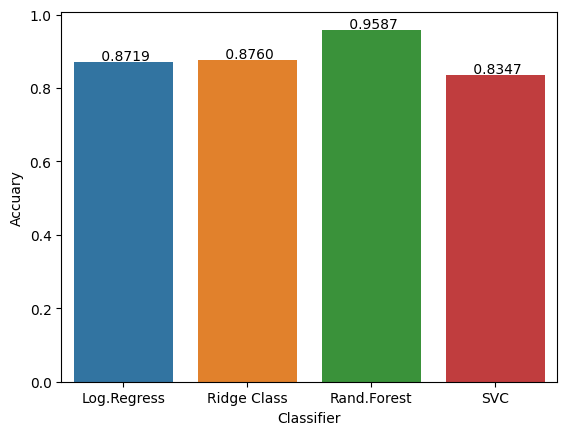

In [10]:
axis = sns.barplot (x = 'Name', y = 'Score', data = tr_split) 
axis.set (xlabel = 'Classifier', ylabel = 'Accuary')

for p in axis.patches: 
    height = p.get_height () 
    axis.text (p.get_x () + p.get_width () / 2, height + 0.005, '{: 1.4f}'. format
                 (height), ha = "center") 

In [11]:
words = ['dolor_cabeza', 'hospital', 'ponerse_mascarilla', 'dolor_garganta', 'dificultad_respirar', 'coronavirus', 'evitar_contacto', 'quedan_en_casa', 'fiebre', 'medico']

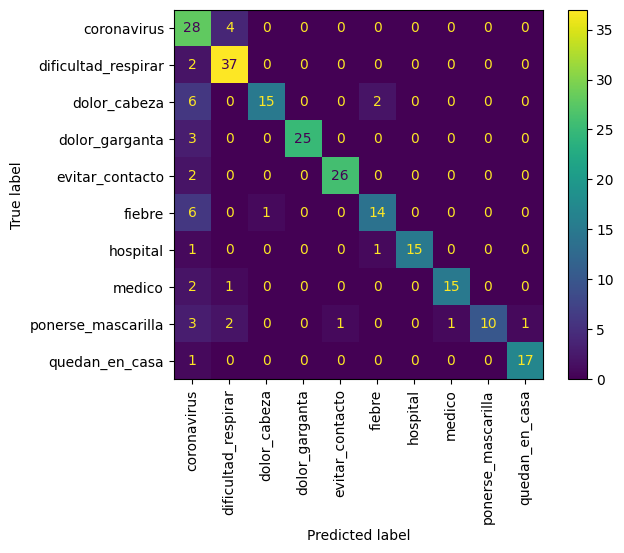

In [12]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation='vertical')
plt.show()

In [21]:
print(classification_report(y_test, y_pred, labels=clf.classes_))

                     precision    recall  f1-score   support

        coronavirus       0.52      0.88      0.65        32
dificultad_respirar       0.84      0.95      0.89        39
       dolor_cabeza       0.94      0.65      0.77        23
     dolor_garganta       1.00      0.89      0.94        28
    evitar_contacto       0.96      0.93      0.95        28
             fiebre       0.82      0.67      0.74        21
           hospital       1.00      0.88      0.94        17
             medico       0.94      0.83      0.88        18
 ponerse_mascarilla       1.00      0.56      0.71        18
     quedan_en_casa       0.94      0.94      0.94        18

           accuracy                           0.83       242
          macro avg       0.90      0.82      0.84       242
       weighted avg       0.88      0.83      0.84       242



In [13]:
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['sv'], f)